In [1]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

import warnings
import PIL

In [2]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

# !wget --no-check-certificate \
#     "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
#     -O "/tmp/cats-and-dogs.zip"

# local_zip = '/tmp/cats-and-dogs.zip'
local_zip = '/mnt/external_data/kaggle_cats_and_dogs/kagglecatsanddogs_3367a.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [4]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    #YOUR CODE GOES HERE
    # cats and dogs dir
    os.mkdir('/tmp/cats-v-dogs/')

    # train and test dir
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')

    # cats and dogs training dir
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')

    # cats and dogs testing dir
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [5]:
def valid_exif(directory, file):
    print('*'*45)
    print(file)
    try:
        img = PIL.Image.open(os.path.join(directory, file))
        with warnings.catch_warnings():
            warnings.simplefilter('error')
            exif_data = img._getexif()
        print('returning True')
        return True
    except Exception as e:
        print(e)
        if str(e).endswith("no attribute '_getexif'"):
            print('returning True')
            return True
        else:
            print('returning False')
            return False

In [ ]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    source_files = os.listdir(SOURCE)
    
    valid_source_files = [source_file for source_file in source_files 
                         if os.path.getsize(os.path.join(SOURCE, source_file))]
    
    random.seed(3)
    training_files = random.sample(valid_source_files, int(SPLIT_SIZE * len(valid_source_files)))
    
    testing_files = [valid_source_file for valid_source_file in valid_source_files
                    if not valid_source_file in training_files]
    
    for training_file in training_files:
        if valid_exif(SOURCE, training_file):
            copyfile(os.path.join(SOURCE, training_file), os.path.join(TRAINING, training_file))
        
    for testing_file in testing_files:
        if valid_exif(SOURCE, testing_file):
            copyfile(os.path.join(SOURCE, testing_file), os.path.join(TESTING, testing_file))
    
# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

In [7]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11231
11221
1247
1246


In [8]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2), 2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2), 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
__________

In [10]:
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(rescale= 1 / 255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    target_size= (150, 150), 
                                                    batch_size = 20, 
                                                    class_mode= 'binary')

VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale= 1.0 / 255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                              target_size = (150, 150), 
                                                              class_mode = 'binary', 
                                                              batch_size = 20)



# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22452 images belonging to 2 classes.
Found 2493 images belonging to 2 classes.


In [11]:
# model.fit_generator(train_generator, 
#                     epochs = 15, 
#                     steps_per_epoch = int(validation_generator.samples / 20) + 1,
#                     verbose= 1, 
#                     validation_data= validation_generator)

In [12]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/5
1123/1123 [==============================] - 277s 247ms/step - loss: 0.5741 - acc: 0.6996 - val_loss: 0.4926 - val_acc: 0.7585
Epoch 2/5
1123/1123 [==============================] - 275s 245ms/step - loss: 0.4499 - acc: 0.7924 - val_loss: 0.4898 - val_acc: 0.7653
Epoch 3/5
1123/1123 [==============================] - 274s 244ms/step - loss: 0.3983 - acc: 0.8240 - val_loss: 0.4511 - val_acc: 0.8087
Epoch 4/5
1123/1123 [==============================] - 305s 271ms/step - loss: 0.3592 - acc: 0.8473 - val_loss: 0.4106 - val_acc: 0.8263
Epoch 5/5
1123/1123 [==============================] - 287s 255ms/step - loss: 0.3255 - acc: 0.8641 - val_loss: 0.4169 - val_acc: 0.8203


Text(0.5,1,'Training and validation loss')

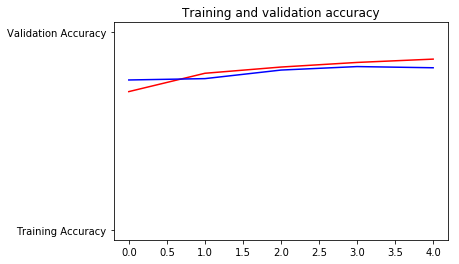

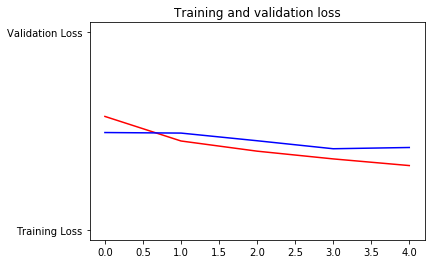

In [13]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [15]:
# # Here's a codeblock just for fun. You should be able to upload an image here 
# # and have it classified without crashing

# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(# YOUR CODE HERE))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0])
#   if classes[0]>0.5:
#     print(fn + " is a dog")
#   else:
#     print(fn + " is a cat")

Original Image


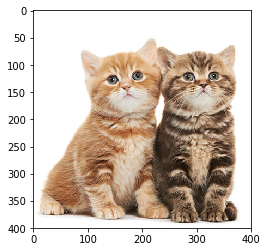

Resized Image


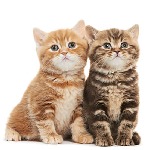

(150, 150, 3)
Image as array


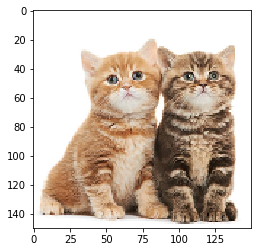

(1, 150, 150, 3)
[0.34808224]
cat1.jpg is a cat
Original Image


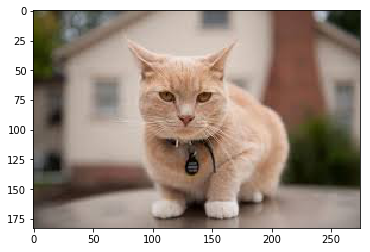

Resized Image


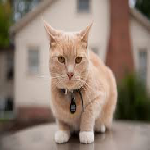

(150, 150, 3)
Image as array


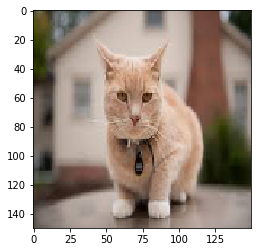

(1, 150, 150, 3)
[0.6737752]
cat2.jpeg is a dog
Original Image


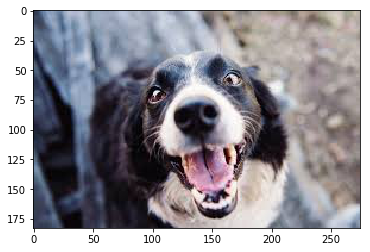

Resized Image


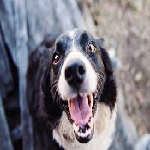

(150, 150, 3)
Image as array


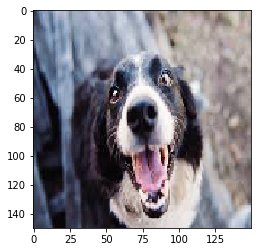

(1, 150, 150, 3)
[0.9048995]
dog1.jpeg is a dog
Original Image


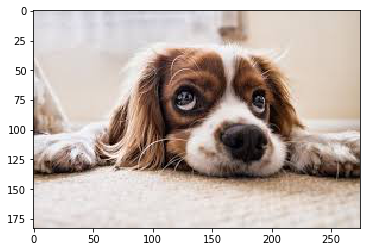

Resized Image


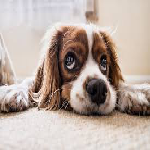

(150, 150, 3)
Image as array


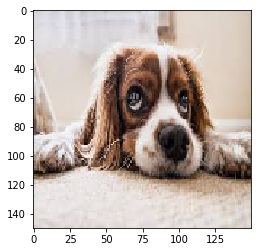

(1, 150, 150, 3)
[0.4349502]
dog2.jpeg is a cat
Original Image


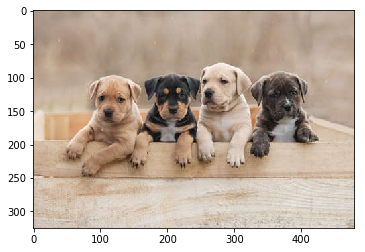

Resized Image


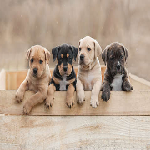

(150, 150, 3)
Image as array


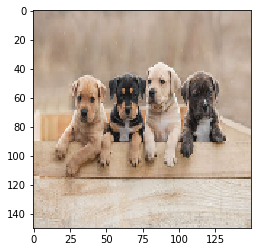

(1, 150, 150, 3)
[0.3309667]
dog3.jpg is a cat


In [17]:
import numpy as np
from keras.preprocessing import image

# uploaded=files.upload()
test_img_dir = '/mnt/external_data/test_images/'
files = ['cat1.jpg', 'cat2.jpeg', 'dog1.jpeg', 'dog2.jpeg', 'dog3.jpg']

# for fn in uploaded.keys():
for file in files:
 
  # predicting images
    path = test_img_dir + file
    blah_img = plt.imread(path)
    print('Original Image')
    plt.imshow(blah_img)
    plt.show()
    
    
    img=image.load_img(path, target_size=(150, 150))
    print('Resized Image')
    display(img)
    
    x=image.img_to_array(img)
    print(x.shape)
    print('Image as array')
    plt.figure()
    plt.imshow(x.astype(int))   # needs to be integer or else the .inshow does weird scaling
    plt.show()
    
    x /= 255
    x=np.expand_dims(x, axis=0)
    print(x.shape)
    
    images  = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0.5:
        print(file + " is a dog")

    else:
        print(file + " is a cat")
 